# Summary of last lecture

Yesterday I showed how to rigorously compute an approximation of the invariant density of a deterministic dynamical system that satisfies a Lasota-Yorke inequality through an a posteriori estimate of the mixing rates of the Ulam operator.

I showed how it is possible to estimate the invariant density, how to use the coarse fine estimates to get mixing rates for a finer operator and how it is possible to estimate the BV mixing rates for the abstract operator.

# Approximating the stationary measure for a random dynamical system with additive noise

In [1]:
import Pkg; Pkg.add(path = "https://github.com/orkolorko/InvariantMeasures.jl/")

    Updating git-repo `https://github.com/orkolorko/InvariantMeasures.jl`
    Updating registry at `~/.julia/registries/General`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`


In [2]:
using InvariantMeasures

# A simple example

In [19]:
using Plots

In [8]:
B = Ulam(1024)
D = mod1_dynamic(x->2*x+0.5*x*(1-x))

Piecewise-defined dynamic with 2 branches

We define now the Noise Kernel to be a uniform distribution in $[-0.05, 0.05]$, with periodic boundary conditions.
The reflecting boundary conditions are still buggy, so the periodic boundary condition work as default.

In [214]:
NK = UniformNoiseUlam(0.05, B) #this is not exported yet, since it is still experimental

InvariantMeasures.DiscretizedNoiseKernelUlam{Vector{Float64}}([0.05, 0.0500001], [2.0000000000019327, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0  …  10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 2.0000000000019327], 7.73070496506989e-12, :periodic, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

In [10]:
Q = DiscretizedOperator(B, D)

IntegralPreservingDiscretizedOperator{SparseArrays.SparseMatrixCSC{Interval{Float64}, Int64}}(
⢳⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠸⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠈⢧⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠹⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠘⣆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠹⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠸⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠹⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⢹⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠹⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⢳⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠹⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⢳⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⣆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠈⢧⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⣆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠘⣆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⣆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠘⡆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⢦⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠹⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⢧⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠹⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⢧⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢳⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢳⡀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢳⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠳⡄⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢧⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠹⣄⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⢧⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⣆⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⢧⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⢧⡀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⢧⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢳⡀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⣇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠹⣄⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⣆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⢦)

In [12]:
norms = powernormboundsnoise(B; Q=Q, NK=NK)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:10


64-element Vector{Float64}:
 1.000000000007958
 1.0000000000159162
 1.0000000000238742
 0.9949619287962681
 0.44524879995965394
 0.1884320974675943
 0.06621935794468838
 0.021983590031667936
 0.021983590031842887
 0.021983590032017834
 0.02198359003219278
 0.021872835139774744
 0.00978816708040516
 ⋮
 5.0256756433561e-11
 2.1268975969282866e-11
 7.474405644023205e-12
 2.48136307129162e-12
 2.481363071311367e-12
 2.481363071331114e-12
 2.481363071350861e-12
 2.4688617874561423e-12
 1.1048239297567952e-12
 4.675684481021117e-13
 1.643142694085911e-13
 5.45492684789954e-14

In [14]:
w = invariant_vector_noise(B, Q, NK)

1024-element Vector{Float64}:
 1.0102995963851
 1.0070847798640012
 1.0038782013417138
 1.0006792747823612
 0.9974843852394806
 0.99429900813822
 0.9911216681386161
 0.9879460924058888
 0.9847833784679623
 0.9816261382008343
 0.9784725964714871
 0.975332291714
 0.9721937688351577
 ⋮
 1.049392499549473
 1.046099857184945
 1.0428088341671402
 1.0395310742518913
 1.0362540380825522
 1.0329867079601815
 1.029727636075422
 1.0264700505417537
 1.0232236802779398
 1.019982951874225
 1.0167461814841667
 1.013521484976506

In [20]:
error = distance_from_invariant_noise(B, Q, NK, w, norms)

0.11372792614396066

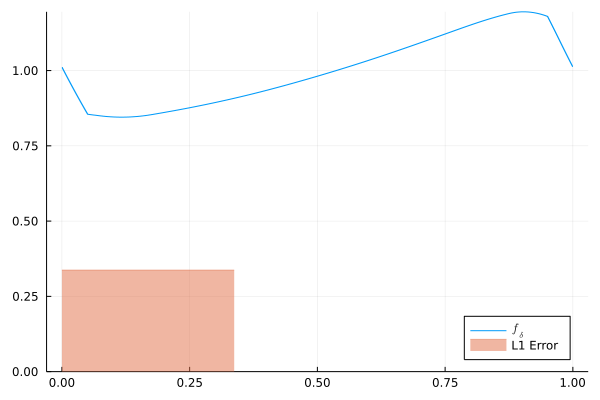

In [21]:
plot(B, w)
plot!(B, error)

In [15]:
B_fine = Ulam(2^16)
Q_fine = DiscretizedOperator(B_fine, D)
NK_fine = UniformNoiseUlam(0.05, B_fine)

InvariantMeasures.DiscretizedNoiseKernelUlam{Vector{Float64}}([0.05, 0.0500001], [8.000000000994987, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0  …  10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 8.000000000994987], 3.987224772572517e-9, :periodic, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

In [17]:
fine_norms = finepowernormboundsnoise(B, B_fine, norms; Qfine = Q_fine, NKfine=NK_fine)

65-element Vector{Float64}:
 1.0000000040163286
 1.0000000080326572
 1.0000000120489858
 1.0000000160653144
 1.000000020081643
 0.498910538036197
 0.24644196856088732
 0.12606938645688445
 0.08248029218335763
 0.08248029251462559
 0.08248029284589355
 0.0824802931771615
 0.08248029350842946
 ⋮
 3.1484814906048916e-7
 3.148481503250228e-7
 3.1484815158955643e-7
 3.1484815285409007e-7
 2.1664495383983807e-7
 1.4173892326247675e-7
 9.273201157714669e-8
 6.066947436322583e-8
 3.969271297914157e-8
 2.5968767327898485e-8
 2.5968767432197586e-8
 2.596876753649669e-8

In [22]:
w_fine = invariant_vector_noise(B_fine, Q_fine, NK_fine)

65536-element Vector{Float64}:
 1.0091593052535521
 1.0091091924910427
 1.0090590815926481
 1.0090089714958002
 1.0089588641173086
 1.0089087583262473
 1.0088586529083776
 1.0088085513733909
 1.0087584497670714
 1.0087083500952185
 1.0086582531726218
 1.0086081567453393
 1.0085580624740742
 ⋮
 1.0097607904831853
 1.0097106570317709
 1.0096605266957044
 1.0096103962617133
 1.0095602684979437
 1.0095101424042134
 1.0094600173353807
 1.0094098949454948
 1.0093597734977036
 1.0093096538378556
 1.0092595360263557
 1.009209419855965

In [27]:
error_fine = distance_from_invariant_noise(B_fine, Q_fine, NK_fine, w_fine, fine_norms)

0.002278253628240899

In [28]:
plot(B_fine, w_fine)
plot!(B_fine, error_fine)

In [29]:
logder = discretizationlogder(B_fine, D)

Observable(Ulam{LinRange{Float64}}(range(0.0, stop=1.0, length=65537)), Interval{Float64}[[0.916287, 0.916288], [0.916281, 0.916282], [0.916275, 0.916276], [0.916269, 0.91627], [0.916263, 0.916264], [0.916257, 0.916258], [0.916251, 0.916252], [0.916244, 0.916245], [0.916238, 0.916239], [0.916232, 0.916233]  …  [0.405561, 0.405562], [0.405551, 0.405552], [0.405541, 0.405542], [0.405531, 0.405532], [0.405521, 0.405522], [0.40551, 0.405511], [0.4055, 0.405501], [0.40549, 0.405491], [0.40548, 0.405481], [0.40547, 0.405471]], [0.405465, 0.916291])

In [30]:
integrateobservable(B_fine, logder, w_fine, error_fine)

┌ Info: [-0.00208755, 0.00208755]
└ @ InvariantMeasures /home/isaia/.julia/packages/InvariantMeasures/SvHJk/src/Observables.jl:107


[0.664463, 0.668639]

In [32]:
abstract_norms = abstractpowernormboundsnoise(B, NK, norms)

65-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0
 0.4989105375460213
 0.24644196786606765
 0.12606938554499372
 0.08248029104940188
 0.08248029104940188
 0.08248029104940188
 0.08248029104940188
 0.08248029104940188
 ⋮
 3.1484812308891364e-7
 3.1484812308891364e-7
 3.1484812308891364e-7
 3.1484812308891364e-7
 2.1664494004765123e-7
 1.4173891331558155e-7
 9.273200446529307e-8
 6.066946931507064e-8
 3.96927094178139e-8
 2.5968764828731507e-8
 2.5968764828731507e-8
 2.5968764828731507e-8

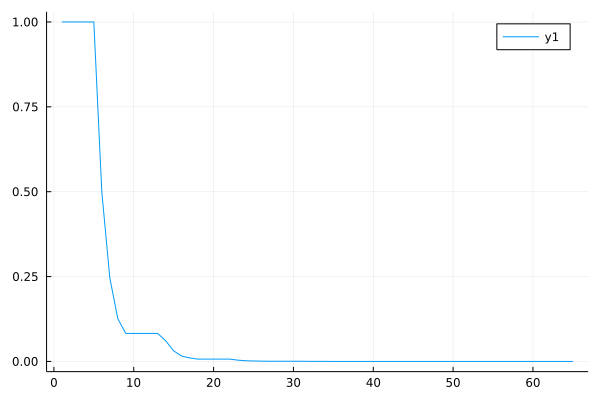

In [33]:
plot(abstract_norms)

# A more complicated example

Now we will analyze an example that come from the family of examples introduced in [Nisoli I. - How does noise induce order](https://arxiv.org/abs/2003.08422) where it is introduced a family of maps such that the associated random dynamical system with BV noise and periodic boundary shows a transition of the Lyapunov exponent from positive to negative as the noise size increases.

The argument in the paper is purely analytical and does not use computer assisted tools. We will confirm this transition through a computer assisted proof.

In [209]:
using Plots

In [212]:
D = PwMap([x->1-2^5*(0.5-x)^5, x->1-2^5*(x-0.5)^5], 
                                         [Interval(0), Interval(0.5), Interval(1)], 
                                         [0 1;
                                          0 1])

Piecewise-defined dynamic with 2 branches

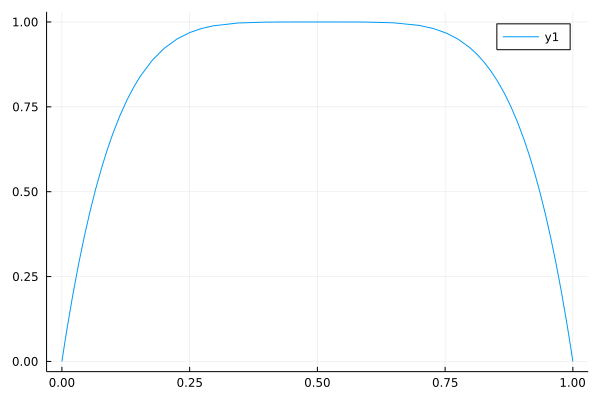

In [213]:
plot(D, 0, 1) 
# remark that I'm plotting the PwMap which is a member of D to make this more elegant I would need to define a plot recipe for UnimodalMap

In [38]:
B = Ulam(1024)

Ulam{LinRange{Float64}}(range(0.0, stop=1.0, length=1025))

In [39]:
Q = DiscretizedOperator(B, D)

┌ Info: Maximum iterates reached
│   (max_iter, x, f(x)) = (100, [0, 1.67317e-45], [-0, 3.33067e-16])
└ @ InvariantMeasures.Contractors /home/isaia/.julia/packages/InvariantMeasures/SvHJk/src/Contractors.jl:68


IntegralPreservingDiscretizedOperator{SparseArrays.SparseMatrixCSC{Interval{Float64}, Int64}}(
⣇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣸
⢸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡇
⠘⡆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢰⠃
⠀⢧⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡼⠀
⠀⢸⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⡇⠀
⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⠀⠀
⠀⠀⢹⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡏⠀⠀
⠀⠀⠘⡆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢰⠃⠀⠀
⠀⠀⠀⢳⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡞⠀⠀⠀
⠀⠀⠀⠘⡆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢰⠃⠀⠀⠀
⠀⠀⠀⠀⢳⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡞⠀⠀⠀⠀
⠀⠀⠀⠀⠘⡆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢰⠃⠀⠀⠀⠀
⠀⠀⠀⠀⠀⢹⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⡏⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⢧⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡼⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠘⣆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣰⠃⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠘⣆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣰⠃⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠘⣆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣰⠃⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⢦⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡴⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣠⠞⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠙⠲⠤⣄⣀⣀⣀⡀⢀⣀⣠⣤⣖⣋⣁⣀⣀⣀⣀⣀⣀⣀⣀⣀⣀⣀⣀)

As you can see, the PwMap type does not behave well with unimodal maps, because of the zero in the derivative. While this is going to be corrected in the assembler, I will show you how this is possible to be solved through Julia multiple dispatch.
This is nice to know, since it makes possible to extend the package without having to speak with the developers or know the intricacies of the implementation.
The question is that, since there are some points where the derivative is $0$, this leads to problems in computing the preimages.

In [41]:
struct UnimodalMap <: Dynamic
    D::PwMap
    α::Interval 
end

UnimodalMap(α::Real) = UnimodalMap(PwMap([x->1-2^α*(0.5-x)^α, x->1-2^α*(x-0.5)^α], 
                                         [Interval(0), Interval(0.5), Interval(1)], 
                                         [0 1;
                                          0 1]), Interval(α))

InvariantMeasures.DynamicDefinition.nbranches(D::UnimodalMap) = 2

In [172]:
D = UnimodalMap(4)

UnimodalMap(Piecewise-defined dynamic with 2 branches, [4, 4])

In [173]:
# this is going to be a simplified version of the preimage routine, since the definition of the map is really 
# simple, for more complicated functions, more general methods need to be defined, as in the code
# since our map has an explicit inverse function we do not even need to use the Newton method

function InvariantMeasures.DynamicDefinition.preim(D::UnimodalMap, k, y, ϵ)
    exp = 1/D.α
    if k == 1
        return (1-(1-y)^exp)/2
    elseif k == 2
        return (1+(1-y)^exp)/2
    end
end

In [174]:
Q = DiscretizedOperator(B, D)

IntegralPreservingDiscretizedOperator{SparseArrays.SparseMatrixCSC{Interval{Float64}, Int64}}(
⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸
⢹⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡏
⢸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡇
⠈⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⠁
⠀⢧⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡼⠀
⠀⢸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡇⠀
⠀⠘⡆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢰⠃⠀
⠀⠀⣇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣸⠀⠀
⠀⠀⢸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡇⠀⠀
⠀⠀⠈⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⠁⠀⠀
⠀⠀⠀⢳⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡞⠀⠀⠀
⠀⠀⠀⠘⡆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢰⠃⠀⠀⠀
⠀⠀⠀⠀⢳⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡞⠀⠀⠀⠀
⠀⠀⠀⠀⠘⡆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢰⠃⠀⠀⠀⠀
⠀⠀⠀⠀⠀⢹⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⡏⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⢧⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡼⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠈⢧⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡼⠁⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠈⢧⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⡼⠁⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣠⠞⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠙⠲⠤⣄⣀⣀⣀⣀⣀⣀⣀⣀⣀⣀⣠⠤⠖⠋⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀)

In [194]:
NK = UniformNoiseUlam(0.05, B) 

InvariantMeasures.DiscretizedNoiseKernelUlam{Vector{Float64}}([0.05, 0.0500001], [2.0000000000019327, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0  …  10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 2.0000000000019327], 7.73070496506989e-12, :periodic, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

In [195]:
norms = powernormboundsnoise(B; Q=Q, NK=NK)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:09


64-element Vector{Float64}:
 1.0000000000086402
 1.0000000000172804
 1.0000000000259206
 1.0000000000345608
 0.6797937567531559
 0.36178222937547205
 0.12158499628055407
 0.05726378663465975
 0.05726378663515452
 0.057263786635649294
 0.057263786636144065
 0.057263786636638836
 0.038927564642286513
 ⋮
 1.9326811415084248e-8
 9.102491582497152e-9
 4.287067909441301e-9
 2.019112140186059e-9
 2.0191121402035043e-9
 2.0191121402209495e-9
 2.019112140238395e-9
 2.019112140255841e-9
 1.106726405201691e-9
 5.212431358239034e-10
 2.454937420545435e-10
 1.1562200678706568e-10

In [177]:
w = invariant_vector_noise(B, Q, NK)

1024-element Vector{Float64}:
 3.2318760771384305
 3.221833233896504
 3.2115382707034223
 3.2009817022077365
 3.1901525877349526
 3.1790408396594585
 3.1676371363665834
 3.1559299108211927
 3.143908806492478
 3.131559965770986
 3.1188680872589853
 3.105821976716683
 3.0924019738421333
 ⋮
 3.335446917949495
 3.327869389461788
 3.320118434558113
 3.312190233685661
 3.304079514328244
 3.295780640407111
 3.287287688256877
 3.278594416649049
 3.2696939182277114
 3.260577650016659
 3.2512406060139343
 3.2416757113725314

In [178]:
error = distance_from_invariant_noise(B, Q, NK, w, norms)

0.12755414702585613

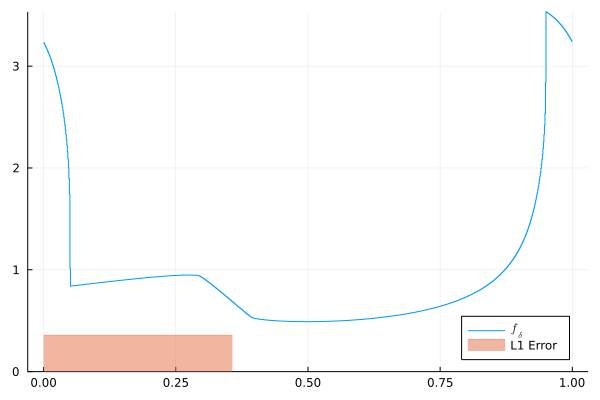

In [179]:
plot(B, w)
plot!(B, error)

In [180]:
B_fine = Ulam(2^16)
Q_fine = DiscretizedOperator(B_fine, D)
NK_fine = UniformNoiseUlam(0.05, B_fine)

InvariantMeasures.DiscretizedNoiseKernelUlam{Vector{Float64}}([0.05, 0.0500001], [8.000000000994987, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0  …  10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 8.000000000994987], 3.987224772572517e-9, :periodic, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

In [181]:
fine_norms = finepowernormboundsnoise(B, B_fine, norms; Qfine = Q_fine, NKfine=NK_fine)

65-element Vector{Float64}:
 1.0000000040454324
 1.0000000080908649
 1.0000000121362973
 1.0000000161817297
 1.0000000202271622
 0.733504694747827
 0.42213177848689454
 0.18546757520725463
 0.12233371928174384
 0.12233371977663665
 0.12233372027152944
 0.12233372076642224
 0.12233372126131503
 ⋮
 3.351792139171959e-6
 3.3517921527314068e-6
 3.3517921662908554e-6
 3.351792179850304e-6
 3.2842206667862304e-6
 2.1662596745601543e-6
 1.4288567833103254e-6
 9.424685928414703e-7
 6.216487606509601e-7
 4.1003719864421815e-7
 4.1003720030299585e-7
 4.100372019617736e-7

In [182]:
w_fine = invariant_vector_noise(B_fine, Q_fine, NK_fine)

65536-element Vector{Float64}:
 3.2326040961292013
 3.232449194419327
 3.232294233619373
 3.232139213621017
 3.231984133848737
 3.2318289940912366
 3.23167379474441
 3.231518536006338
 3.2313632181005865
 3.23120784061327
 3.231052403511726
 3.230896906762526
 3.2307413498062068
 ⋮
 3.2344582957731904
 3.234304104110003
 3.234149853237694
 3.2339955436054817
 3.2338411751028477
 3.2336867475300743
 3.2335322608562413
 3.2333777150523515
 3.23322311008272
 3.2330684455981302
 3.2329137217131936
 3.232758938567794

In [183]:
error_fine = distance_from_invariant_noise(B_fine, Q_fine, NK_fine, w_fine, fine_norms)

0.0025474884094780405

In [184]:
plot(B_fine, w_fine)
plot!(B_fine, error_fine)

Our ```discretizationlogder``` method does not work, due to the singularity of the derivative,
so we will define a version specific for this kind of maps; this is quite simple, since the derivative of the map
is nothing else than
$$
2^\alpha \alpha (0.5-x)^{\alpha-1}
$$
if $x\in [0, 0.5]$ and
$$
2^\alpha \alpha (x-0.5)^{\alpha-1}
$$
if $x\in[0.5, 1]$.

So, it is easy to find a primitive
$$
\int \log(2^\alpha \alpha (0.5-x)^{\alpha-1}) dx = (x-0.5)\log(2^\alpha \alpha (0.5-x)^{\alpha-1})-\alpha x+x+C;
$$
we will use also the simmetry of the function to speed up computations.

In [185]:
import InvariantMeasures: discretizationlogder

function discretizationlogder(B, D::UnimodalMap)  
    # we check that B has an even number of elements
    N = length(B)
    @assert rem(N, 2)==0
    
    v = zeros(Interval{Float64}, length(B))
    α = D.α
    F(x) = (x-0.5)*log(2^α*α*(0.5-x)^(α-1))-α*x+x
    for i in 1:N÷2-1
        #@info F(B.p[i+1])
        v[i] = F(B.p[i+1])-F(B.p[i])
        v[end-i+1]=v[i]
    end
    v[N÷2] = -α*0.5+0.5-F(B.p[N÷2]) # the computer is not able to do limits, so we write this explictly
    v[N÷2+1] = v[N÷2] 
    v*=length(B) #normalization
    return Observable(B, v, Interval(Inf))
end

discretizationlogder (generic function with 2 methods)

In [186]:
logder = discretizationlogder(B_fine, D)

Observable(Ulam{LinRange{Float64}}(range(0.0, stop=1.0, length=65537)), Interval{Float64}[[2.07939, 2.0794], [2.0793, 2.07931], [2.07921, 2.07922], [2.07912, 2.07913], [2.07902, 2.07903], [2.07893, 2.07894], [2.07884, 2.07885], [2.07875, 2.07876], [2.07866, 2.07867], [2.07857, 2.07858]  …  [2.07857, 2.07858], [2.07866, 2.07867], [2.07875, 2.07876], [2.07884, 2.07885], [2.07893, 2.07894], [2.07902, 2.07903], [2.07912, 2.07913], [2.07921, 2.07922], [2.0793, 2.07931], [2.07939, 2.0794]], [∞, ∞])

In [187]:
plot(B_fine, logder.v; ylims = (-NaN, NaN))

We will now estimate the rigorous error on the integral, to do so, we need to use Corollary 30 in [Galatolo-Monge-Nisoli- Existence of noise induced order, a computer aided proof](https://iopscience.iop.org/article/10.1088/1361-6544/ab86cd).

We will split the interval $X = [0, 1]$ into two pieces, $E$ and $X\setminus E$, then, denoting by $H(x)=\log(|T'(x)|)$, $f$ the abstract stationary state and by $f_k$ its approximation, we have:
$$
|\int H df - \int H df_k|\leq ||H||_{L^1(E)}||f||_{L^{\infty}(E)}+\frac{|\sup_{X\setminus E} H+ \inf_{X\setminus E} H|}{2}||f-f_k||_{L^1}
$$

We start by computing 
$$
\int H df_k
$$

In [188]:
val = ((logder.v)'*w_fine)/length(B_fine) #normalization again

[0.215281, 0.215282]

We know that 
$$||f||_{BV}\leq ||\rho||_{BV}$$
where $\rho$ is the kernel.

This follows from the fact that
$$
||L_{\xi}f||_{BV}\leq ||\rho||_{BV} ||f||_{L^1}
$$
which is a kind of Lasota-Yorke inequality.

In [189]:
_, C = dfly(strong_norm(B_fine), weak_norm(B_fine), NK_fine) #we call it LY in the code

(0.0, 10.0)

There is a choice involved in the operation, the choice of $E$. We will take multiples of the partition and do the estimate, again, symmetrically.

In [190]:
function f(x, D) # we will use this to compute the inf and the sup
    α = D.α
    return log(2^α*α*(0.5-x)^(α-1))
end

f (generic function with 1 method)

In [191]:
#this function implements Corollary 30
function various_error_bounds(B, D, NK, logder, error_fine; k = 10)
    v = zeros(Float64, k)
    N = length(B) ÷ 2
    sup = f(Interval(0), D)
    _, C = dfly(strong_norm(B), weak_norm(B), NK)
    for i in 0:k-1
        inf = f(Interval(B.p[N-i]), D)
        v[i+1] = (abs(inf+sup)/2*error_fine+2*C*sum((abs.(logder.v))[N-i: N])/length(B)).hi
    end
    return v
end

various_error_bounds (generic function with 5 methods)

In [192]:
var_err = various_error_bounds(B_fine, D, NK_fine, logder, error_fine)

10-element Vector{Float64}:
 0.04423265606890043
 0.05011464916439646
 0.05661689439449124
 0.06325812157410811
 0.06991463775242958
 0.07654279813523007
 0.08312530370778629
 0.08965536221814897
 0.09613085804419967
 0.10255188759663732

Therefore, we have that the best error we can get is the first one, so the final computation of the Lyapunov exponent is

In [193]:
val+Interval(-var_err[1], var_err[1])

[0.171048, 0.259514]

While this is a wide interval, the important thing is that for a noise of size $0.05$ the Lyapunov exponent is __positive__!
We will now redo the computation for a wider noise amplitude; please remark that we do not need to recompute the operators Q and Q_fine.

In [203]:
NK = UniformNoiseUlam(0.4, B)

InvariantMeasures.DiscretizedNoiseKernelUlam{Vector{Float64}}([0.4, 0.400001], [0.7500000000154898, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25  …  1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 0.7500000000154898], 6.207301339600235e-11, :periodic, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

Progress: 100%|█████████████████████████████████████████| Time: 0:00:15


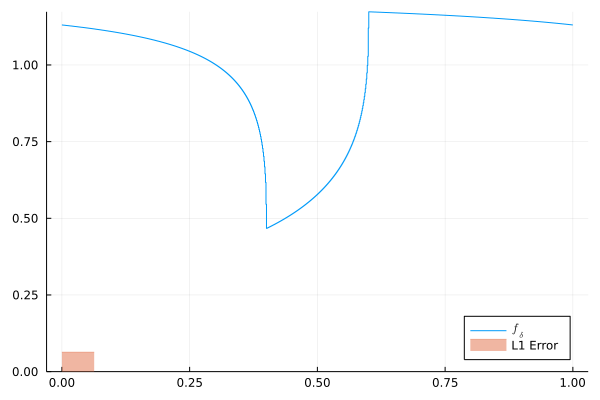

In [204]:
norms = powernormboundsnoise(B; Q=Q, NK=NK)
w = invariant_vector_noise(B, Q, NK)
error = distance_from_invariant_noise(B, Q, NK, w, norms)
plot(B, w)
plot!(B, error)

In [205]:
NK_fine = UniformNoiseUlam(0.4, B_fine)
w_fine = invariant_vector_noise(B_fine, Q_fine, NK_fine)
fine_norms = finepowernormboundsnoise(B, B_fine, norms; Qfine = Q_fine, NKfine=NK_fine)
error_fine = distance_from_invariant_noise(B_fine, Q_fine, NK_fine, w_fine, fine_norms)
plot(B_fine, w_fine)
plot!(B_fine, error_fine)

In [206]:
val = ((logder.v)'*w_fine)/length(B_fine) #normalization again

[-0.396349, -0.396348]

In [207]:
var_err = various_error_bounds(B_fine, D, NK_fine, logder, error_fine)

10-element Vector{Float64}:
 0.0026479725779511736
 0.003604845517246745
 0.004547267784655592
 0.005469403370819269
 0.00637281482158444
 0.007259629554606513
 0.008131730205208354
 0.008990682253682944
 0.009837778656874713
 0.010674094854468975

Again, the first error is the best

In [208]:
val+Interval(-var_err[1], var_err[1])

[-0.398997, -0.3937]

We have proved that, for noise size $0.4$ the Lyapunov exponent is negative!
So, we have made a computer assisted proof of the transition of the Lyapunov exponent from positive to negative as the noise size increases.

# Summary of the lecture

In this lecture I showed how it is possible to approximate the stationary measure of a random dynamical system with additive noise.

We applied these methods to prove a transition of the Lyapunov exponent from positive to negative as the noise size increases